In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

%matplotlib inline 

In [2]:
data = pd.read_csv('./train 3.csv')

In [3]:
data.shape

(159571, 8)

In [4]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
non_sense = ['\n', '|', '\t', '\s']

In [6]:
def change_non_sense(cell):
    for a in non_sense:
        if a in cell:
            return cell.replace(a,'')
        else:
            return cell

In [7]:
data['comment_text'] = data['comment_text'].apply(change_non_sense)

In [8]:
data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [9]:
def change_to_bool(cell):
    return bool(cell)

In [10]:
data['toxic'] = data['toxic'].apply(change_to_bool)
data['severe_toxic'] = data['severe_toxic'].apply(change_to_bool)
data['obscene'] = data['obscene'].apply(change_to_bool)
data['threat'] = data['threat'].apply(change_to_bool)
data['insult'] = data['insult'].apply(change_to_bool)
data['identity_hate'] = data['identity_hate'].apply(change_to_bool)


Lets see the worst... which is EVERYTHING..!

In [11]:
all_hate = data[data.toxic & data.severe_toxic & data.obscene & data.threat & data.insult & data.identity_hate]

In [12]:
len(all_hate)

31

In [13]:
lens = data.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(391.55248134059445, 587.0903345602147, 5000)

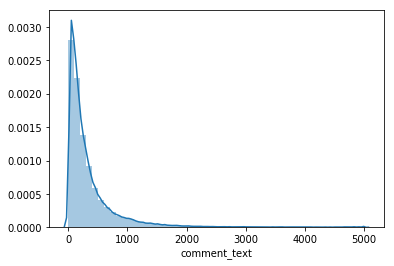

In [14]:
sns.distplot(lens)

In [15]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
data['None'] = 1-data[label_cols].max(axis=1)

In [18]:
data["None"].value_counts()

1    143346
0     16225
Name: None, dtype: int64

In [20]:
data["None"].value_counts(True)

1    0.898321
0    0.101679
Name: None, dtype: float64

Baseline accuracy is 0.898321. 

In [21]:
data.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
None             0
dtype: int64

In [27]:
data[data['None']==0][['comment_text']]

,comment_text
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
12,Hey... what is it..@ | talk .What is it... an ...
16,"Bye! Don't look, come or think of comming back..."
42,You are gay or antisemmitian? Archangel WHite ...
43,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!"
44,I'm Sorry I'm sorry I screwed around with some...
51,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...
55,Stupid peace of shit stop deleting my stuff as...
56,=Tony Sidaway is obviously a fistfuckee. He lo...
58,My Band Page's deletion. You thought I was gon...


# Modeling

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline

In [28]:
import re, string
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub(r' \1 ', s).split()

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null bool
severe_toxic     159571 non-null bool
obscene          159571 non-null bool
threat           159571 non-null bool
insult           159571 non-null bool
identity_hate    159571 non-null bool
None             159571 non-null int64
dtypes: bool(6), int64(1), object(2)
memory usage: 4.6+ MB


In [68]:
X_train, X_holdout, y_train, y_holdout = train_test_split(data['comment_text'], data[label_cols])

In [69]:
n = data.shape[0]
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=3, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )
X_train_transformed = vec.fit_transform(data['comment_text'])
X_holdout_transformed = vec.transform(data['comment_text'])

In [79]:
n = data.shape[0]

In [80]:
def pr(y_i, y):
    p = X_train_transformed[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [81]:
def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=True)
    x_nb = X_train_transformed.multiply(r)
    return m.fit(x_nb, y), r

In [ ]:
preds = np.zeros((X_holdout_transformed.shape[0], len(label_cols)))

for i, j in enumerate(label_cols):
    print('fit', j)
    m,r = get_mdl(data[j])
    preds[:,i] = m.predict_proba(X_holdout_transformed.multiply(r))[:,1]

fit toxic


In [66]:
preds

array([[  3.81003286e-03,   5.13632568e-04,   1.42752942e-03,
          1.09641345e-04,   1.60445040e-03,   3.38726699e-04],
       [  7.04595293e-03,   4.01739356e-04,   9.73812622e-04,
          1.54096989e-04,   2.19409765e-03,   1.94412613e-04],
       [  1.49110674e-02,   3.31573976e-04,   2.65267931e-03,
          1.09173754e-04,   5.00095941e-03,   7.46038592e-04],
       ..., 
       [  7.88063262e-03,   2.43041499e-04,   1.83986238e-03,
          9.41119688e-05,   1.90820723e-03,   2.44420526e-04],
       [  3.44658365e-03,   2.02068184e-04,   1.73763605e-03,
          9.62587387e-05,   1.43110884e-03,   2.83789237e-04],
       [  2.81705782e-02,   3.42997975e-04,   8.65835972e-03,
          1.46056031e-04,   8.10196411e-03,   3.08335938e-04]])

<159571x424637 sparse matrix of type '<class 'numpy.float64'>'
	with 17705772 stored elements in Compressed Sparse Row format>

In [ ]:
submid = pd.DataFrame({'id': subm["id"]})
submission = pd.concat([submid, pd.DataFrame(preds, columns = label_cols)], axis=1)
submission.to_csv('submission.csv', index=False)